In [ ]:
from sklearn.tree import DecisionTreeClassifier,  export_graphviz

In [ ]:
# features (1 sim, 0 não)

# pelo longo?
# perna curta?
# faz auau?
puddle =    [1, 1, 1]
pug =       [0, 1, 0]
golden =    [1, 0, 1]


gato_1 = [1, 1, 0]
gato_2 = [1, 0, 0]
gato_3 = [1, 1, 0]


# 1 => cachorro, 0 => gato
treino_x = [puddle, pug, golden, gato_1, gato_2, gato_3]
treino_y = [1,1,1,0,0,0] # labels / etiqueta

In [3]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(treino_x, treino_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [4]:
viralata =  [0, 0, 1] # 
model.predict([viralata])

array([1])

Legal, mas eu queria entender o modelo que ele criou!

(SLIDES)




In [6]:
dt_bin_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                    random_state=0)
dt_bin_clf.fit(treino_x, treino_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

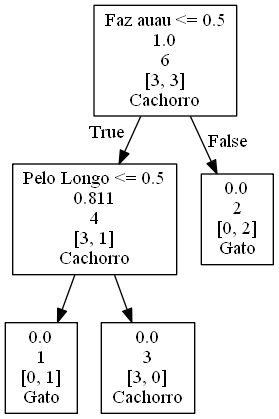

In [7]:
import pydotplus
from IPython.display import Image, display

reg_dot_data = export_graphviz(dt_bin_clf,
                               out_file=None, 
                               label = None,
                               feature_names=['Pelo Longo', 'Perna Curta', 'Faz auau'], 
                               class_names=['Cachorro', 'Gato'])
reg_graph = pydotplus.graph_from_dot_data(reg_dot_data)
Image(reg_graph.create_png())

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

data = pd.DataFrame()
# Hipotese. Pessoas sem filhos, ou maiores de 50 anos sao bons pagadores
data['sexo'] =          ['m', 'm', 'm', 'f', 'f', 'f', 'f']
data['idade'] =         [30, 60, 65, 18, 25, 56, 19]
data['filhos'] =        [1, 0, 1, 0, 0, 1, 1]
data['Class'] =         [1, 0, 0, 0, 0, 0, 1]



In [9]:
display(data)

,sexo,idade,filhos,Class
0,m,30,1,1
1,m,60,0,0
2,m,65,1,0
3,f,18,0,0
4,f,25,0,0
5,f,56,1,0
6,f,19,1,1


# 0 = bom 1 = mau


In [14]:
pagamento_clf = DecisionTreeClassifier()

data_to_train =  data.drop('Class', 1)

pagamento_clf.fit(data_to_train, data['Class'])


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
le = preprocessing.LabelEncoder()
# Vamos converter a string para uma categoria
le.fit(data['sexo'])

# Aplicar o encoder para a coluna
data_to_train['sexo'] = le.transform(data['sexo'])

In [16]:
pagamento_clf.fit(data, data['Class'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

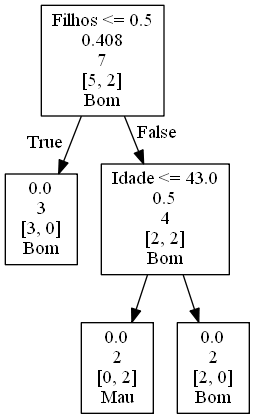

In [19]:
reg_dot_data = export_graphviz(pagamento_clf,
                               out_file=None, 
                               label = None,
                               feature_names=['Sexo', 'Idade', 'Filhos'], 
                               class_names=['Bom', 'Mau'])
reg_graph = pydotplus.graph_from_dot_data(reg_dot_data)
Image(reg_graph.create_png())